<a href="https://colab.research.google.com/github/chingyaousf/Oral-Squamous-Cell-Carcinoma-CRISPR_gene_Dep-Prediction-by-ML/blob/main/scripts/MLpredictionDep_05_Model_KNN_SQSTM1_Oral_Squamous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [59]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/filtered_arranged_table_Oral_Squamous.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,4.238023,0.056584,0.111031,4.206331,0.000000,5.802193,0.042644,4.758623,4.022368,...,2.313246,2.462052,5.465974,4.342697,3.725741,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,2.432959,0.014355,0.189034,0.298658,0.000000,3.928844,0.028569,5.015694,3.403268,...,0.014355,1.097611,5.661921,2.650765,2.185867,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,5.128871,0.014355,0.150560,3.758090,0.056584,5.972233,0.000000,5.498570,4.773996,...,1.422233,2.330558,6.575766,3.486714,2.691534,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,3.117695,0.070389,0.163499,4.870858,0.000000,5.693766,0.250962,5.144862,3.732269,...,0.028569,1.970854,5.786335,2.847997,4.270529,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.000000,2.195348,0.084064,4.704872,3.203201,...,0.584963,1.454176,5.126808,3.407353,3.764474,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,2.809414,0.028569,0.124328,4.440952,0.000000,4.280956,0.000000,4.626439,4.581954,...,0.963474,2.192194,6.153197,3.140779,3.288359,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.000000,5.150966,0.176323,5.780573,3.709291,...,0.286881,2.801159,6.649615,4.120186,3.599318,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.475085,0.042644,0.150560,0.713696,0.000000,4.104337,0.475085,5.367022,4.557655,...,0.214125,2.613532,4.647315,3.802193,3.825786,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.000000,4.319762,0.356144,5.359310,4.672425,...,0.028569,1.970854,6.375561,3.693766,3.690417,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.333424,0.000000,0.201634,0.739848,0.000000,3.430285,0.000000,5.051372,3.393691,...,0.042644,2.042644,5.304511,2.931683,3.382667,0.008650,0.986207,0.018890,0.975153,0.038666


In [15]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/SQSTM1_Oral_Squamous_gt_00.csv")
data

,DepMap_ID,A1CF (29974) Exp,A2M (2) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AACS (65985) Exp,AADAC (13) Exp,AADACL4 (343066) Exp,AADAT (51166) Exp,...,ZSWIM8 (23053) Exp,ZXDA (7789) Exp,ZXDB (158586) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,0.056584,0.111031,0.000000,5.802193,0.042644,4.022368,0.000000,0.000000,2.748461,...,6.870118,1.226509,2.272023,2.462052,5.465974,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.014355,0.189034,0.000000,3.928844,0.028569,3.403268,0.941106,0.000000,0.956057,...,4.503985,0.613532,1.280956,1.097611,5.661921,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,0.014355,0.150560,0.056584,5.972233,0.000000,4.773996,0.790772,0.000000,0.871844,...,5.190220,1.438293,3.090853,2.330558,6.575766,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,0.070389,0.163499,0.000000,5.693766,0.250962,3.732269,0.056584,0.000000,2.526069,...,5.567119,0.516015,1.448901,1.970854,5.786335,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.028569,0.189034,0.000000,2.195348,0.084064,3.203201,1.333424,0.000000,2.104337,...,4.739848,0.545968,1.201634,1.454176,5.126808,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,0.028569,0.124328,0.000000,4.280956,0.000000,4.581954,0.028569,0.000000,1.097611,...,4.221877,1.084064,3.042644,2.192194,6.153197,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.014355,0.042644,0.000000,5.150966,0.176323,3.709291,0.641546,0.000000,1.726831,...,6.123294,1.316146,2.176323,2.801159,6.649615,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.042644,0.150560,0.000000,4.104337,0.475085,4.557655,0.111031,0.000000,2.684819,...,6.174726,1.250962,1.695994,2.613532,4.647315,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,0.014355,0.422233,0.000000,4.319762,0.356144,4.672425,3.228049,0.000000,1.718088,...,6.909413,1.232661,2.150560,1.970854,6.375561,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.000000,0.201634,0.000000,3.430285,0.000000,3.393691,0.137504,0.000000,1.232661,...,3.868884,0.632268,1.422233,2.042644,5.304511,0.008650,0.986207,0.018890,0.975153,0.038666


In [28]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/SQSTM1_Oral_Squamous_gt_01.csv")
data

,DepMap_ID,A4GNT (51146) Exp,AAMP (14) Exp,ABCA13 (154664) Exp,ABCB5 (340273) Exp,ABCB6 (10058) Exp,ABCB8 (11194) Exp,ABCB9 (23457) Exp,ABCC2 (1244) Exp,ABCC3 (8714) Exp,...,ZNHIT1 (10467) Exp,ZPLD1 (131368) Exp,ZSWIM4 (65249) Exp,ZSWIM8 (23053) Exp,ZYX (7791) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,0.042644,6.217037,0.028569,0.042644,5.224581,4.649615,2.845992,1.333424,4.647890,...,5.795195,0.056584,1.454176,6.870118,5.465974,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.028569,5.619706,2.173127,0.042644,1.879706,3.442280,1.739848,0.443607,1.432959,...,5.556429,0.422233,0.948601,4.503985,5.661921,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,0.000000,6.823495,0.526069,0.042644,4.349790,4.841973,2.073820,0.389567,3.633431,...,6.169324,0.014355,2.526069,5.190220,6.575766,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,0.250962,6.138733,0.722466,0.014355,3.972693,3.695994,2.220330,1.589763,5.311067,...,7.918565,0.070389,2.536053,5.567119,5.786335,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.084064,6.155830,3.185867,0.014355,2.021480,3.667892,1.963474,0.641546,3.903038,...,5.776630,0.028569,1.104337,4.739848,5.126808,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,0.000000,5.546277,0.782409,0.042644,3.177918,2.961623,1.811471,0.815575,2.646163,...,6.867526,0.014355,1.752749,4.221877,6.153197,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.176323,7.073820,5.264912,0.014355,4.348374,4.525443,2.266037,1.007196,6.054414,...,5.629648,0.250962,3.517276,6.123294,6.649615,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.475085,6.025029,4.055716,0.137504,4.658211,3.552131,2.906891,1.356144,2.700440,...,6.996615,0.000000,0.970854,6.174726,4.647315,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,0.356144,5.955592,2.277985,0.000000,5.419202,4.621173,4.053111,1.427606,2.580145,...,5.731998,0.356144,2.673556,6.909413,6.375561,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.000000,6.710944,2.140779,0.389567,2.809414,3.381283,2.121015,0.378512,3.040892,...,6.499368,0.275007,0.948601,3.868884,5.304511,0.008650,0.986207,0.018890,0.975153,0.038666


In [41]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/SQSTM1_Oral_Squamous_ng_01.csv")
data

,DepMap_ID,A2ML1 (144568) Exp,ABCB7 (22) Exp,ABRAXAS1 (84142) Exp,ACADM (34) Exp,ACRBP (84519) Exp,ADA (100) Exp,ADAD2 (161931) Exp,ADAT2 (134637) Exp,ADCY4 (196883) Exp,...,ZNF821 (55565) Exp,ZNF831 (128611) Exp,ZNF878 (729747) Exp,ZPBP2 (124626) Exp,ZUP1 (221302) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,4.206331,3.708187,2.063503,3.805292,0.214125,4.025915,0.831877,3.764474,0.378512,...,2.097611,0.000000,0.137504,0.000000,4.009885,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.298658,2.994580,0.669027,2.788686,0.189034,4.285402,0.124328,1.550901,0.411426,...,1.097611,0.000000,0.028569,0.000000,2.889474,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,3.758090,3.524816,1.536053,3.593354,0.713696,5.202026,2.053111,1.427606,0.137504,...,1.765535,0.000000,0.214125,0.042644,3.044394,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,4.870858,3.211012,1.867896,4.997744,0.137504,3.106013,1.104337,2.469886,0.226509,...,1.163499,0.000000,0.014355,0.000000,4.100978,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.650765,3.838952,1.475085,4.204767,0.097611,4.545968,0.176323,2.490570,0.056584,...,0.918386,0.000000,0.150560,0.000000,2.970854,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,4.440952,4.100978,2.179511,3.876762,0.485427,3.021480,0.443607,1.049631,0.056584,...,1.944858,0.000000,0.286881,0.000000,2.849999,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.250962,3.724650,1.604071,4.585563,1.137504,6.472000,1.622930,3.193772,0.137504,...,1.056584,0.000000,0.014355,0.014355,3.936402,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.713696,3.766595,1.584963,4.705978,0.722466,4.277241,1.163499,2.107688,0.356144,...,2.435629,0.000000,0.056584,0.000000,3.185867,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.797013,4.393004,1.918386,3.951401,0.545968,7.344562,0.687061,3.447579,0.903038,...,1.594549,0.014355,0.963474,0.000000,3.705978,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.739848,3.510962,1.214125,3.929791,0.238787,5.593354,0.321928,1.659925,0.863938,...,1.169925,0.000000,0.000000,0.000000,3.204767,0.008650,0.986207,0.018890,0.975153,0.038666


In [60]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000181,4.238023,0.056584,0.111031,4.206331,0.000000,5.802193,0.042644,4.758623,4.022368,...,2.313246,2.462052,5.465974,4.342697,3.725741,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,2.432959,0.014355,0.189034,0.298658,0.000000,3.928844,0.028569,5.015694,3.403268,...,0.014355,1.097611,5.661921,2.650765,2.185867,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,5.128871,0.014355,0.150560,3.758090,0.056584,5.972233,0.000000,5.498570,4.773996,...,1.422233,2.330558,6.575766,3.486714,2.691534,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,3.117695,0.070389,0.163499,4.870858,0.000000,5.693766,0.250962,5.144862,3.732269,...,0.028569,1.970854,5.786335,2.847997,4.270529,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.000000,2.195348,0.084064,4.704872,3.203201,...,0.584963,1.454176,5.126808,3.407353,3.764474,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,2.809414,0.028569,0.124328,4.440952,0.000000,4.280956,0.000000,4.626439,4.581954,...,0.963474,2.192194,6.153197,3.140779,3.288359,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.000000,5.150966,0.176323,5.780573,3.709291,...,0.286881,2.801159,6.649615,4.120186,3.599318,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.475085,0.042644,0.150560,0.713696,0.000000,4.104337,0.475085,5.367022,4.557655,...,0.214125,2.613532,4.647315,3.802193,3.825786,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.000000,4.319762,0.356144,5.359310,4.672425,...,0.028569,1.970854,6.375561,3.693766,3.690417,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.333424,0.000000,0.201634,0.739848,0.000000,3.430285,0.000000,5.051372,3.393691,...,0.042644,2.042644,5.304511,2.931683,3.382667,0.008650,0.986207,0.018890,0.975153,0.038666


In [61]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["SQSTM1_8878_Dep"]]

targets

,SQSTM1_8878_Dep
0,0.080037
1,0.068937
2,0.036775
3,0.026842
4,0.072139
5,0.019149
6,0.055766
7,0.033679
8,0.052276
9,0.038666


In [62]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=42)


In [63]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=4)

In [65]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


In [66]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [[0.05589149]
 [0.02933259]
 [0.04207153]
 [0.01388816]
 [0.03024066]
 [0.04210584]
 [0.04741565]
 [0.04313507]
 [0.05208713]
 [0.03296508]
 [0.04203447]
 [0.05208713]
 [0.05344285]
 [0.05889305]
 [0.02921167]
 [0.05208713]
 [0.04531185]]


In [67]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.0005864569942367722


In [68]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.020836427845612772


In [69]:
# Calculate R-squared (coefficient of determination)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Coefficient of Determination (R-squared): -0.27833886303137145


In [70]:
# SQSTM1_filtered_arranged_table_Oral_Squamous.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error: 0.0005864569942367722
Mean Absolute Error: 0.020836427845612772
Coefficient of Determination (R-squared): -0.27833886303137145


In [26]:
# SQSTM1_Oral_Squamous_gt_00.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.0007568016867261239
Mean Absolute Error: 0.02193571470490266
Coefficient of Determination (R-squared): -0.649650387423133


In [39]:
# SQSTM1_Oral_Squamous_gt_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.0006612022175632482
Mean Absolute Error: 0.020333116922925016
Coefficient of Determination (R-squared): -0.4412659399409815


In [53]:
# SQSTM1_Oral_Squamous_ng_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.0005558975058526406
Mean Absolute Error: 0.02036034255009395
Coefficient of Determination (R-squared): -0.21172633727126566


In [14]:
# SQSTM1_filtered_arranged_table_Oral_Squamous.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_filtered_arranged_table_Oral_Squamous.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
24,ACH-001347,2.467279,0.000000,0.042644,5.655352,0.0,5.690976,0.000000,4.590362,4.090007,...,0.815575,2.134221,3.754888,0.042644,2.367371,7.249161,2.963474,3.806324,0.055891,0.060235
13,ACH-000735,0.189034,0.014355,0.150560,0.189034,0.0,3.738768,0.042644,5.073820,4.909773,...,0.310340,0.963474,4.180307,0.056584,2.353323,5.420213,3.140779,3.270529,0.029333,0.062425
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.0,4.319762,0.356144,5.359310,4.672425,...,1.232661,2.150560,4.311067,0.028569,1.970854,6.375561,3.693766,3.690417,0.042072,0.052276
25,ACH-001509,0.124328,0.028569,0.000000,3.107688,0.0,5.355087,0.000000,4.093391,3.942045,...,0.757023,1.613532,3.910733,0.028569,1.356144,5.250583,2.207893,3.849999,0.013888,0.029486
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.0,2.195348,0.084064,4.704872,3.203201,...,0.545968,1.201634,3.240314,0.584963,1.454176,5.126808,3.407353,3.764474,0.030241,0.072139
40,ACH-002045,0.275007,0.000000,0.000000,0.871844,0.0,3.819668,0.000000,4.286142,4.575312,...,0.669027,1.432959,2.582556,0.000000,2.518535,5.084064,2.319040,3.357552,0.042106,0.027967
19,ACH-000836,0.669027,0.000000,0.310340,0.275007,0.0,1.195348,0.042644,5.192983,4.230357,...,1.137504,1.922198,3.865919,1.682573,2.627607,5.562242,3.158660,4.238787,0.047416,0.019017
39,ACH-002029,0.000000,0.000000,1.189034,0.000000,0.0,2.367371,0.000000,5.485105,4.238023,...,0.695994,1.356144,2.877744,0.000000,2.575312,5.732269,2.553361,4.410070,0.043135,0.016159
29,ACH-001543,2.333424,0.000000,0.000000,2.935460,0.0,4.038261,0.084064,5.200850,3.147307,...,1.117695,1.769772,2.935460,0.070389,1.416840,6.215679,2.358959,4.401221,0.052087,0.019537
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.0,5.150966,0.176323,5.780573,3.709291,...,1.316146,2.176323,4.693766,0.286881,2.801159,6.649615,4.120186,3.599318,0.032965,0.055766


In [27]:
# SQSTM1_Oral_Squamous_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_Oral_Squamous_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1CF_29974_Exp,A2M_2_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AACS_65985_Exp,AADAC_13_Exp,AADACL4_343066_Exp,AADAT_51166_Exp,...,ZSWIM4_65249_Exp,ZSWIM5_57643_Exp,ZSWIM6_57688_Exp,ZSWIM8_23053_Exp,ZXDA_7789_Exp,ZXDB_158586_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
24,ACH-001347,0.000000,0.042644,0.0,5.690976,0.000000,4.090007,0.042644,0.0,0.201634,...,1.195348,0.000000,2.618239,5.552746,0.815575,2.134221,2.367371,7.249161,0.039822,0.060235
13,ACH-000735,0.014355,0.150560,0.0,3.738768,0.042644,4.909773,1.659925,0.0,1.565597,...,2.073820,0.584963,2.620586,5.258142,0.310340,0.963474,2.353323,5.420213,0.052800,0.062425
8,ACH-000548,0.014355,0.422233,0.0,4.319762,0.356144,4.672425,3.228049,0.0,1.718088,...,2.673556,0.070389,3.078951,6.909413,1.232661,2.150560,1.970854,6.375561,0.042072,0.052276
25,ACH-001509,0.028569,0.000000,0.0,5.355087,0.000000,3.942045,0.310340,0.0,1.636915,...,0.400538,0.056584,2.182692,5.257388,0.757023,1.613532,1.356144,5.250583,0.013888,0.029486
4,ACH-000472,0.028569,0.189034,0.0,2.195348,0.084064,3.203201,1.333424,0.0,2.104337,...,1.104337,0.111031,1.691534,4.739848,0.545968,1.201634,1.454176,5.126808,0.028017,0.072139
40,ACH-002045,0.000000,0.000000,0.0,3.819668,0.000000,4.575312,0.963474,0.0,1.286881,...,0.790772,0.344828,1.459432,4.478972,0.669027,1.432959,2.518535,5.084064,0.038386,0.027967
19,ACH-000836,0.000000,0.310340,0.0,1.195348,0.042644,4.230357,2.134221,0.0,2.307429,...,0.879706,0.042644,2.201634,4.739308,1.137504,1.922198,2.627607,5.562242,0.047416,0.019017
39,ACH-002029,0.000000,1.189034,0.0,2.367371,0.000000,4.238023,2.989139,0.0,0.000000,...,0.773996,0.042644,2.333424,4.331992,0.695994,1.356144,2.575312,5.732269,0.063485,0.016159
29,ACH-001543,0.000000,0.000000,0.0,4.038261,0.084064,3.147307,0.014355,0.0,1.490570,...,2.017922,0.084064,2.304511,4.923625,1.117695,1.769772,1.416840,6.215679,0.052087,0.019537
6,ACH-000518,0.014355,0.042644,0.0,5.150966,0.176323,3.709291,0.641546,0.0,1.726831,...,3.517276,0.575312,3.092546,6.123294,1.316146,2.176323,2.801159,6.649615,0.032965,0.055766


In [40]:
# SQSTM1_Oral_Squamous_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_Oral_Squamous_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A4GNT_51146_Exp,AAMP_14_Exp,ABCA13_154664_Exp,ABCB5_340273_Exp,ABCB6_10058_Exp,ABCB8_11194_Exp,ABCB9_23457_Exp,ABCC2_1244_Exp,ABCC3_8714_Exp,...,ZNF703_80139_Exp,ZNF862_643641_Exp,ZNFX1_57169_Exp,ZNHIT1_10467_Exp,ZPLD1_131368_Exp,ZSWIM4_65249_Exp,ZSWIM8_23053_Exp,ZYX_7791_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
24,ACH-001347,0.000000,6.113742,0.056584,0.000000,3.196922,4.233428,1.815575,0.464668,1.952334,...,1.704872,1.182692,4.976822,7.428109,0.389567,1.195348,5.552746,7.249161,0.039822,0.060235
13,ACH-000735,0.042644,6.839708,0.400538,0.137504,3.301588,4.113534,2.757023,0.411426,3.035624,...,1.604071,0.201634,4.278728,6.647890,0.056584,2.073820,5.258142,5.420213,0.052800,0.062425
8,ACH-000548,0.356144,5.955592,2.277985,0.000000,5.419202,4.621173,4.053111,1.427606,2.580145,...,1.570463,1.752749,5.428946,5.731998,0.356144,2.673556,6.909413,6.375561,0.042072,0.052276
25,ACH-001509,0.000000,4.519793,0.124328,0.028569,2.611172,2.970854,1.545968,1.469886,4.326250,...,0.594549,2.028569,3.792855,5.923625,0.028569,0.400538,5.257388,5.250583,0.023608,0.029486
4,ACH-000472,0.084064,6.155830,3.185867,0.014355,2.021480,3.667892,1.963474,0.641546,3.903038,...,1.531069,1.238787,3.654206,5.776630,0.028569,1.104337,4.739848,5.126808,0.028017,0.072139
40,ACH-002045,0.000000,6.338781,0.111031,0.000000,5.536985,2.877744,1.956057,2.304511,4.086614,...,2.066950,0.189034,2.867896,7.347134,0.000000,0.790772,4.478972,5.084064,0.039038,0.027967
19,ACH-000836,0.042644,6.545042,0.356144,0.124328,2.687061,4.621173,3.349082,1.443607,2.301588,...,0.925999,0.286881,3.552131,6.158862,0.000000,0.879706,4.739308,5.562242,0.047416,0.019017
39,ACH-002029,0.000000,6.889352,0.150560,0.000000,0.790772,3.678072,2.226509,0.321928,2.733354,...,1.056584,1.070389,3.480265,7.766860,0.056584,0.773996,4.331992,5.732269,0.024927,0.016159
29,ACH-001543,0.084064,5.599615,1.941106,0.000000,3.680324,3.602884,2.046142,1.201634,2.611172,...,1.545968,0.565597,3.829850,6.911931,0.000000,2.017922,4.923625,6.215679,0.034200,0.019537
6,ACH-000518,0.176323,7.073820,5.264912,0.014355,4.348374,4.525443,2.266037,1.007196,6.054414,...,0.555816,3.395063,5.730912,5.629648,0.250962,3.517276,6.123294,6.649615,0.032965,0.055766


In [54]:
# SQSTM1_Oral_Squamous_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_Oral_Squamous_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A2ML1_144568_Exp,ABCB7_22_Exp,ABRAXAS1_84142_Exp,ACADM_34_Exp,ACRBP_84519_Exp,ADA_100_Exp,ADAD2_161931_Exp,ADAT2_134637_Exp,ADCY4_196883_Exp,...,ZNF711_7552_Exp,ZNF714_148206_Exp,ZNF77_58492_Exp,ZNF821_55565_Exp,ZNF831_128611_Exp,ZNF878_729747_Exp,ZPBP2_124626_Exp,ZUP1_221302_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
24,ACH-001347,5.655352,3.648465,1.316146,4.923625,0.773996,2.250962,0.070389,3.016140,0.855990,...,0.389567,1.811471,2.370164,1.867896,0.000000,0.275007,0.000000,3.548437,0.063609,0.060235
13,ACH-000735,0.189034,3.658783,1.669027,4.320485,0.214125,5.471187,0.505891,0.831877,0.000000,...,0.028569,1.963474,1.580145,1.823749,0.000000,0.014355,0.042644,3.238787,0.027430,0.062425
8,ACH-000548,2.797013,4.393004,1.918386,3.951401,0.545968,7.344562,0.687061,3.447579,0.903038,...,0.070389,3.125982,1.835924,1.594549,0.014355,0.963474,0.000000,3.705978,0.043781,0.052276
25,ACH-001509,3.107688,3.039138,1.000000,2.107688,0.925999,3.685940,0.226509,4.000000,1.906891,...,0.344828,1.536053,1.608809,1.104337,0.000000,0.201634,0.000000,4.301588,0.052853,0.029486
4,ACH-000472,0.650765,3.838952,1.475085,4.204767,0.097611,4.545968,0.176323,2.490570,0.056584,...,0.765535,1.996389,0.978196,0.918386,0.000000,0.150560,0.000000,2.970854,0.052087,0.072139
40,ACH-002045,0.871844,3.937344,2.353323,4.828835,0.028569,3.869871,0.056584,1.963474,0.000000,...,1.097611,3.232661,2.173127,1.157044,0.000000,0.238787,0.516015,4.185867,0.069106,0.027967
19,ACH-000836,0.275007,4.527321,2.440952,4.162693,0.000000,3.969012,0.000000,1.432959,0.000000,...,0.111031,0.275007,0.000000,0.226509,0.000000,0.000000,0.000000,3.605257,0.045312,0.019017
39,ACH-002029,0.000000,4.108524,2.553361,5.218006,0.084064,4.465322,0.111031,2.179511,0.669027,...,0.000000,3.204767,2.056584,2.073820,0.000000,0.321928,0.028569,4.090853,0.045957,0.016159
29,ACH-001543,2.935460,3.820690,1.967169,3.821710,0.263034,4.904002,0.505891,2.389567,0.028569,...,0.042644,1.891419,1.664483,1.475085,0.000000,0.189034,0.000000,2.356144,0.042144,0.019537
6,ACH-000518,0.250962,3.724650,1.604071,4.585563,1.137504,6.472000,1.622930,3.193772,0.137504,...,0.014355,3.582556,1.709291,1.056584,0.000000,0.014355,0.014355,3.936402,0.028232,0.055766


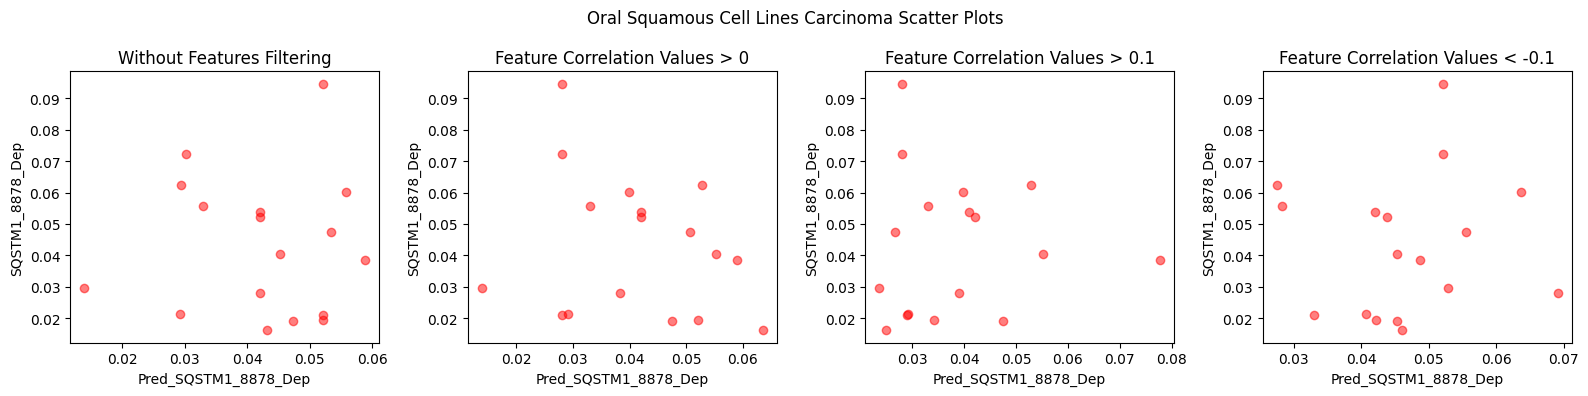

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_filtered_arranged_table_Oral_Squamous.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_Oral_Squamous_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_Oral_Squamous_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SQSTM1_Oral_Squamous_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Oral Squamous Cell Lines Carcinoma Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_SQSTM1_8878_Dep'], df['SQSTM1_8878_Dep'],c='red',alpha=0.5)
    ax.set_xlabel('Pred_SQSTM1_8878_Dep')
    ax.set_ylabel('SQSTM1_8878_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
